In [ ]:
import tensorflow as tf

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
x = np.arange(-100,100,4)

y = x + 10

In [ ]:
x,y

(array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96]),
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106]))

In [ ]:
len(x),len(y)

(50, 50)

In [ ]:
# splitting the datain train test split

x_train = x[:40]
y_train = y[:40]

x_test = x[40:]
y_test = y[40:]

len(x_train),len(x_test)

(40, 10)

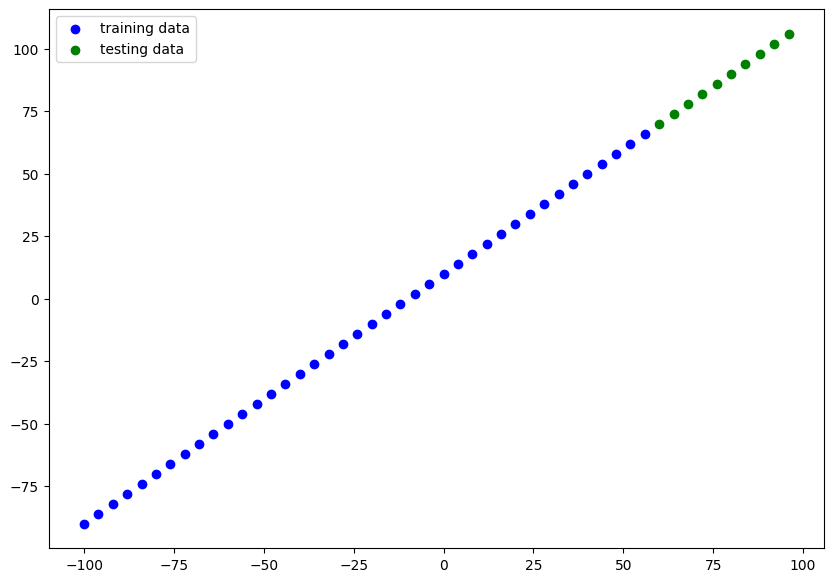

In [ ]:
plt.figure(figsize = (10,7))

plt.scatter(x_train,y_train,c="b",label = "training data")

plt.scatter(x_test,y_test,c="g",label = "testing data")

plt.legend();

In [ ]:
# create an instance of model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape = [1])
])

# compile the model

model.compile(
            loss = tf.keras.losses.mae,
            optimizer = tf.keras.optimizers.SGD(),
            metrics = ["mae"]
)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(
          x_train,
          y_train,
          epochs = 100,
          verbose = 0)

In [ ]:
y_pred = model.predict(x_test)

1/1 [==============================] - 0s 127ms/step


In [ ]:
y_pred

array([[38.903526],
       [41.40572 ],
       [43.907913],
       [46.410107],
       [48.9123  ],
       [51.414494],
       [53.916687],
       [56.41888 ],
       [58.921074],
       [61.423267]], dtype=float32)

In [ ]:
def plot_predictions(train_data=x_train,
                     train_labels = y_train,
                     test_data=x_test,
                     test_labels = y_test,
                     predictions=y_pred):

  plt.figure(figsize = (10,7))

  plt.scatter(train_data,train_labels,c="b",label = "training data")

  plt.scatter(test_data,test_labels,c="g",label = "testing data")

  plt.scatter(test_data, predictions,c="r",label ="predictions")

  plt.legend();

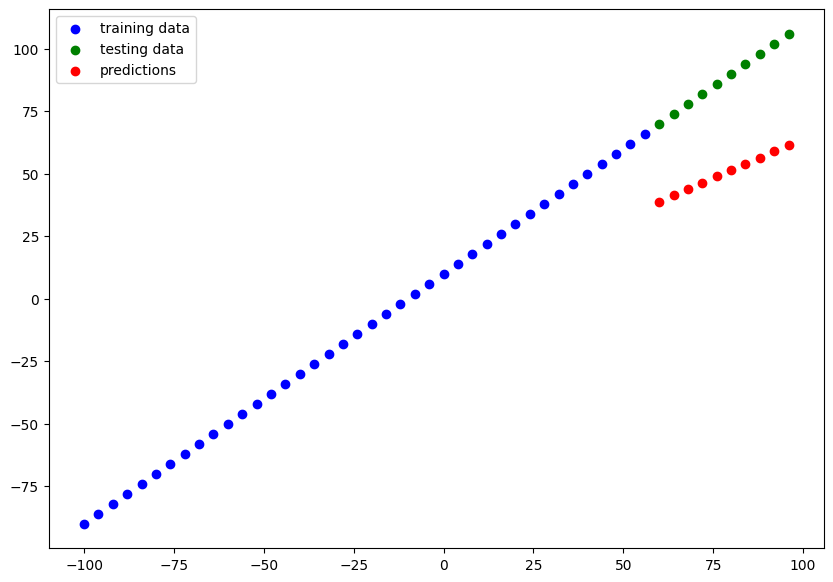

In [ ]:
plot_predictions(predictions=y_pred)

In [ ]:
# evaluate

model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 138ms/step - loss: 37.8366 - mae: 37.8366


[37.83660125732422, 37.83660125732422]

In [ ]:
# mean absolute error

mae = tf.metrics.mean_absolute_error(y_test,y_pred)

mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([49.096474, 46.59428 , 44.092087, 41.589893, 39.0877  , 36.585506,
       34.083313, 31.58112 , 29.078924, 26.576733], dtype=float32)>

In [ ]:
y_test.shape

(10,)

In [ ]:
y_pred.shape

(10, 1)

In [ ]:
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [ ]:
y_pred

array([[38.903526],
       [41.40572 ],
       [43.907913],
       [46.410107],
       [48.9123  ],
       [51.414494],
       [53.916687],
       [56.41888 ],
       [58.921074],
       [61.423267]], dtype=float32)

In [ ]:
mae = tf.metrics.mean_absolute_error(y_test,y_pred.squeeze())

mae

<tf.Tensor: shape=(), dtype=float32, numpy=37.8366>

In [ ]:
y_test.shape

(10,)

In [ ]:
y_pred.squeeze().shape

(10,)

In [ ]:
mse = tf.metrics.mean_squared_error(y_test,y_pred.squeeze())

mse

<tf.Tensor: shape=(), dtype=float32, numpy=1450.1168>

In [ ]:
def mae(y_test,y_pred):

  return tf.metrics.mean_absolute_error(y_test,y_pred)


def mse(y_test,y_pred):

  return tf.metrics.mean_squared_error(y_test,y_pred)

In [ ]:
"""

model _1 : layer = 1 epochs = 100
model_2 : layer = 2 epochs = 100
model_3 : layer = 2 epochs = 200

"""

## Build_model_1

In [ ]:
model_1 = tf.keras.Sequential([

        tf.keras.layers.Dense(1,input_shape = [1])
])

model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model_1.fit(x_train,y_train,epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 10.9950 - mae: 10.9950
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 15.2841 - mae: 15.2841
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 18.7784 - mae: 18.7784
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 17.7978 - mae: 17.7978
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.7381 - mae: 10.7381
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1305 - mae: 11.1305
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 10.5783 - mae: 10.5783
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.0388 - mae: 9.0388
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 7.7286 - mae: 7.7286
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 7.5038 - mae: 7.5038
Epoch 11/100
2/2 [==============================] - 0s 6ms/step -

1/1 [==============================] - 0s 21ms/step


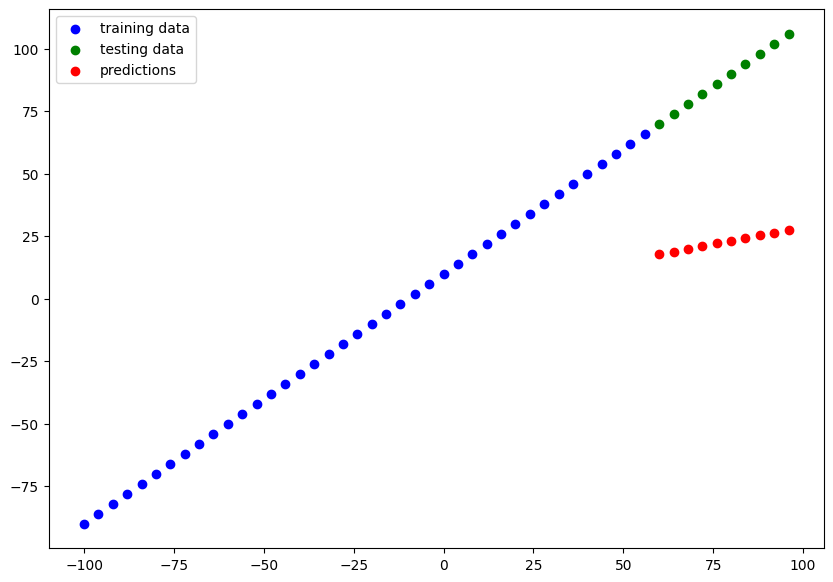

In [ ]:
y_pred_1 = model_1.predict(x_test)

plot_predictions(predictions = y_pred_1)

In [ ]:
# calculating the metrics

mae_1 = mae(y_test,y_pred_1.squeeze()).numpy()
mse_1 = mse(y_test,y_pred_1.squeeze()).numpy()
mae_1,mse_1

(65.34, 4339.0117)

##Build_model_2

In [ ]:
model_2 = tf.keras.Sequential([

        tf.keras.layers.Dense(1,input_shape = [1]),
        tf.keras.layers.Dense(1)
])

model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model_2.fit(x_train,y_train,epochs = 100,verbose = 0)

1/1 [==============================] - 0s 55ms/step


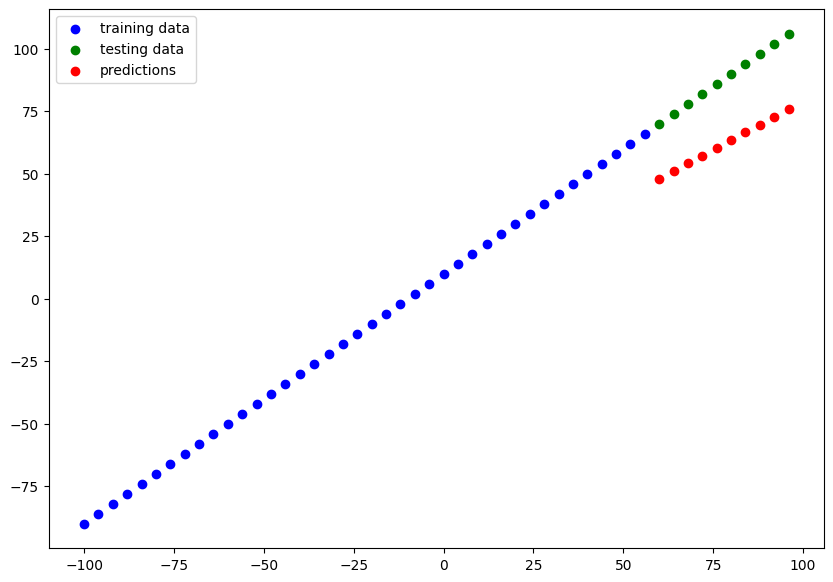

In [ ]:
y_pred_2 = model_2.predict(x_test)

plot_predictions(predictions = y_pred_2)

In [ ]:
# calculating the metrics

mae_2 = mae(y_test,y_pred_2.squeeze()).numpy()
mse_2 = mse(y_test,y_pred_2.squeeze()).numpy()
mae_2,mse_2

(26.071514, 686.54034)

In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_3 = tf.keras.Sequential([

        tf.keras.layers.Dense(1,input_shape = [1]),
        tf.keras.layers.Dense(1)
])

model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model_3.fit(x_train,y_train,epochs = 200,verbose = 0)

1/1 [==============================] - 0s 62ms/step


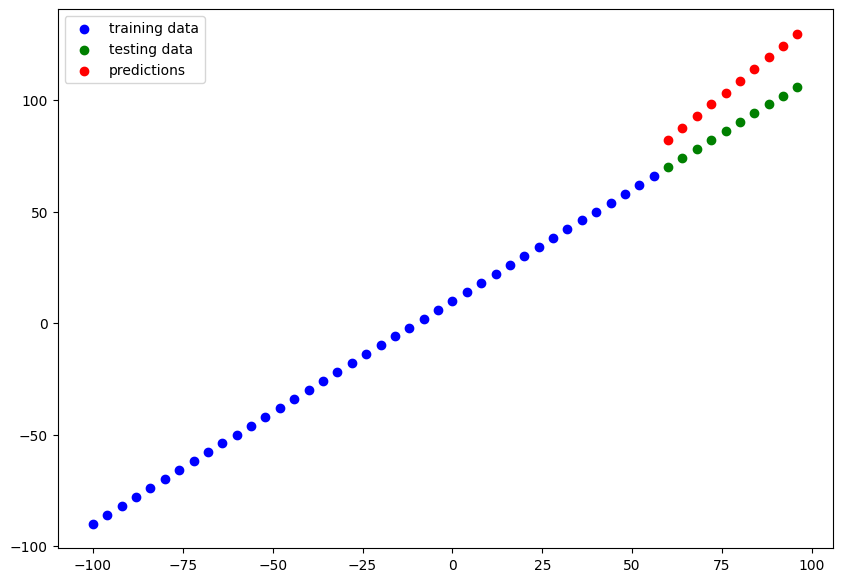

In [ ]:
y_pred_3 = model_3.predict(x_test)

plot_predictions(predictions = y_pred_3)

In [ ]:
# calculating the metrics

mae_3 = mae(y_test,y_pred_3.squeeze()).numpy()
mse_3 = mse(y_test,y_pred_3.squeeze()).numpy()
mae_3,mse_3

(17.986801, 336.85666)

In [ ]:
# creating the data frame and storing all the results

model_results = [["model_1",mae_1,mse_1],
                 ["model_2",mae_2,mse_2],
                 ["model_3",mae_3,mse_3]]

compiled_results = pd.DataFrame(model_results,columns=["model","mae","mse"])

compiled_results

,model,mae,mse
0,model_1,65.339996,4339.011719
1,model_2,26.071514,686.540344
2,model_3,20.792124,436.456360


## Saving the Best Model

In [ ]:
model_3.save('best_model_3_format')

In [ ]:
!pwd

/content


In [ ]:
!ls best_model_3_format

assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


In [ ]:
model_3.save('best_model_3_HDF5_format.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!ls best_model_3_HDF5_format.h5

best_model_3_HDF5_format.h5


## Loading the model

In [ ]:
loaded_model = tf.keras.models.load_model("/content/best_model_3_format")

loaded_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
loaded_pred_3 = loaded_model.predict(x_test)



1/1 [==============================] - 0s 58ms/step


In [ ]:
mae_3 == mae(x_test,loaded_pred_3.squeeze())

17.986801